In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [2]:
#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    


#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",
                         skiprows = 3,
                         header = None)

X_valid = pd.read_csv("X_valid.csv",
                          skiprows = 3,
                          header = None)

#combine header and the data together
X_train.columns = X_header
X_valid.columns = X_header

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")

In [4]:
X_id = X_train.iloc[:,0]
X_feat = X_train.iloc[:,1:]
X_feat_valid=X_valid.iloc[:,1:]
print(X_id.shape)
print(X_feat.shape)
print(Y_train.shape)

(16760,)
(16760, 7488)
(16760, 2)


In [5]:
def featureSelectByMean(df_feat,df_header,cols = None):
    if (cols == None):
        cols = np.full((df_feat.shape[1],), False, dtype = bool)
    for ic in range(len(df_header.columns)):
        if (df_header.iloc[1,ic] == "mean"):
            cols[ic] = True
    
    print("Select features with mean value:")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))        
    return df_feat.iloc[:,cols]
    

X_feat = featureSelectByMean(X_feat,df_X_header)
X_feat_valid=featureSelectByMean(X_feat_valid,df_X_header)

X_feat.describe()

Select features with mean value:
Original: 7488 	Selected: 2496
Select features with mean value:
Original: 7488 	Selected: 2496


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,-0.064803,-0.064101,-0.064031,-0.063712,-0.063905,-0.064175,-0.064640,-0.064856,...,-0.000300,-0.000252,-0.000329,-0.000262,-0.000249,-0.000257,-0.000282,-0.000300,-0.000448,269.869093
std,0.423142,0.428927,0.427698,0.435464,0.436145,0.438468,0.435569,0.432840,0.426678,0.420549,...,0.339446,0.338852,0.338696,0.338709,0.338702,0.338702,0.338711,0.338711,0.338265,315.670695
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,0.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [6]:
X_feat_column=list(X_feat.columns)
##replace all the 0 to NaN --> To aviod 0 counted in the mean calculation
X_feat=X_feat.replace(0,np.NaN)

In [7]:
##To chaange all the NaN to their column mean 
def replace_zero (X_feat):
    for i in list(X_feat.columns):
        current_mean=X_feat[i].mean()
        X_feat[i]=X_feat[i].replace(np.NaN,current_mean)

replace_zero(X_feat)

X_feat.describe()

,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,282.458378
std,0.417218,0.423197,0.421912,0.429907,0.430609,0.433016,0.430047,0.427235,0.420908,0.414654,...,0.339445,0.338852,0.338695,0.338709,0.338701,0.338701,0.338710,0.338710,0.338263,310.242366
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,1.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,72.000000
50%,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,180.000000
75%,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [8]:
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]

X_feat = featureSelectByCorr(X_feat,0.9)
X_feat.describe()

#Here we get the selected column 
X_feat_valid=X_feat_valid[X_feat.columns]
replace_zero(X_feat_valid)
X_feat_valid.describe()

Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 401


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,...,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,-0.066667,-0.066893,33.901003,0.022716,49.026316,-0.000362,4273.263158,-0.001298,4381.100668,0.001462,...,1491.177527,0.001057,-0.014614,62.939432,-0.001093,-0.022048,25.472431,-0.017900,-0.003661,281.375104
std,0.401581,0.393143,41.917444,0.608083,55.735793,0.036359,3450.757110,0.049760,3768.508829,0.110882,...,1243.422001,0.146470,0.565066,71.922807,0.086104,0.831230,30.059925,0.638011,0.341491,366.311074
min,-0.279057,-0.279057,0.000000,-3.131888,0.000000,-0.840928,0.000000,-1.683934,1.000000,-0.561162,...,0.000000,-0.665609,-0.366371,0.000000,-1.212709,-3.517696,0.000000,-1.160785,-0.303768,0.000000
25%,-0.247375,-0.246974,0.000000,0.000000,11.000000,0.000000,1440.750000,0.000000,1161.750000,0.000000,...,456.000000,0.000000,0.000000,10.000000,0.000000,-0.452504,2.000000,-0.396079,0.000000,53.000000
50%,0.000000,0.000000,23.000000,0.000000,26.000000,0.000000,3601.500000,0.000000,3649.500000,0.000000,...,1177.000000,0.000000,0.000000,39.000000,0.000000,0.000000,21.000000,-0.125635,0.000000,145.500000
75%,0.000000,0.000000,48.000000,0.000000,71.000000,0.000000,6371.250000,0.000000,6560.750000,0.000000,...,2255.000000,0.000000,0.000000,89.750000,0.000000,0.164838,30.000000,0.247392,0.000000,351.750000
max,9.600536,9.600536,300.000000,3.492301,382.000000,1.098700,14342.000000,0.985636,15392.000000,5.313097,...,5207.000000,3.025795,8.913147,478.000000,1.594580,6.688082,216.000000,13.340637,12.356220,2345.000000


In [9]:
#further adjust Y

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")
Y_train = Y_train.iloc[:,1:].to_numpy()
Y_train = Y_train.ravel()
Y_valid = Y_valid.iloc[:,1:].to_numpy()
Y_valid = Y_valid.ravel()

In [10]:
#Standardlization of features
#Here we adopt standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_feat)
X_feat_std=scaler.transform(X_feat)
X_feat_valid_std=scaler.transform(X_feat_valid)

In [102]:
#Task 2
#Pass the score_function ‘f_classif’ and the number of features you want to keep in the ‘SelectKBest’ function and fit the X and y to the function:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
uni = SelectKBest(score_func = f_classif, k = 5) #input the number of features, k=10 means we want to see the best 10 selection
fit = uni.fit(X_feat, Y_train)

In [103]:
#Get the feature name(s)
X_feat.columns[fit.get_support(indices=True)].tolist()


['anion gap&mean&1',
 'blood urea nitrogen&mean&1',
 'glascow coma scale total&mean&1',
 'lactate&mean&1',
 'lactic acid&mean&1']

In [84]:
#get the array of two variable
a1=np.array(X_feat[['anion gap&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a1 = LinearRegression()
lm_a1.fit(a1,b)
print("Slope of the Regression Line is : ", lm_a1.coef_)
print("Intercept of Regression Line is : ",lm_a1.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a1 = lm.predict(a1)
rmse_test_a1 = mean_squared_error(b, pred_test_a1, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a1)

Slope of the Regression Line is :  [0.04076146]
Intercept of Regression Line is :  0.0694345706670665
MSE of Linear Regression on testing data is :  0.2571298998702652


In [85]:
#get the array of two variable
a2=np.array(X_feat[['blood urea nitrogen&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a2 = LinearRegression()
lm_a2.fit(a2,b)
print("Slope of the Regression Line is : ", lm_a2.coef_)
print("Intercept of Regression Line is : ",lm_a2.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a2 = lm.predict(a2)
rmse_test_a2 = mean_squared_error(b, pred_test_a2, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a2)

Slope of the Regression Line is :  [0.03405143]
Intercept of Regression Line is :  0.07399886180577477
MSE of Linear Regression on testing data is :  0.2583268633681446


In [87]:
#get the array of two variable
a3=np.array(X_feat[['glascow coma scale total&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a3 = LinearRegression()
lm_a3.fit(a3,b)
print("Slope of the Regression Line is : ", lm_a3.coef_)
print("Intercept of Regression Line is : ",lm_a3.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a3 = lm.predict(a3)
rmse_test_a3 = mean_squared_error(b, pred_test_a3, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a3)

Slope of the Regression Line is :  [-0.04471107]
Intercept of Regression Line is :  0.0683650110505425
MSE of Linear Regression on testing data is :  0.2668415202603173


In [104]:
#get the array of two variable
a4=np.array(X_feat[['lactate&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a4 = LinearRegression()
lm_a4.fit(a4,b)
print("Slope of the Regression Line is : ", lm_a4.coef_)
print("Intercept of Regression Line is : ",lm_a4.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a4 = lm.predict(a4)
rmse_test_a4 = mean_squared_error(b, pred_test_a4, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a4)

Slope of the Regression Line is :  [0.07260576]
Intercept of Regression Line is :  0.07941371122948473
MSE of Linear Regression on testing data is :  0.2569667348847352


In [105]:
#get the array of two variable
a5=np.array(X_feat[['lactic acid&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a5 = LinearRegression()
lm_a5.fit(a5,b)
print("Slope of the Regression Line is : ", lm_a5.coef_)
print("Intercept of Regression Line is : ",lm_a5.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a5 = lm.predict(a4)
rmse_test_a5 = mean_squared_error(b, pred_test_a5, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a5)

Slope of the Regression Line is :  [0.09583366]
Intercept of Regression Line is :  0.08792081128253446
MSE of Linear Regression on testing data is :  0.2569667348847352


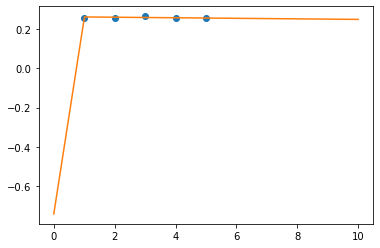

In [111]:
#Develop a piecewise linear model
from scipy import optimize
%matplotlib inline

x = np.array([1,2,3,4,5])
y = np.array([rmse_test_a1,rmse_test_a2,rmse_test_a3,rmse_test_a4,rmse_test_a5])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 10, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

In [112]:
#Task 2 (another version, using 10 samples)
#Pass the score_function ‘f_classif’ and the number of features you want to keep in the ‘SelectKBest’ function and fit the X and y to the function:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
uni = SelectKBest(score_func = f_classif, k = 10) #input the number of features, k=10 means we want to see the best 10 selection
fit = uni.fit(X_feat, Y_train)

In [113]:
#Get the feature name(s)
X_feat.columns[fit.get_support(indices=True)].tolist()

['albumin&mean&1',
 'anion gap&mean&1',
 'blood urea nitrogen&mean&1',
 'glascow coma scale total&mean&1',
 'glucose&mean&13',
 'glucose&mean&20',
 'lactate&mean&1',
 'lactic acid&mean&1',
 'mean corpuscular hemoglobin concentration&mean&1',
 'plateau pressure&mean&1']

In [114]:
#get the array of two variable
a1=np.array(X_feat[['albumin&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a1 = LinearRegression()
lm_a1.fit(a1,b)
print("Slope of the Regression Line is : ", lm_a1.coef_)
print("Intercept of Regression Line is : ",lm_a1.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a1 = lm.predict(a1)
rmse_test_a1 = mean_squared_error(b, pred_test_a1, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a1)

Slope of the Regression Line is :  [-0.0482862]
Intercept of Regression Line is :  0.077460583303007
MSE of Linear Regression on testing data is :  0.2643633208107754


In [115]:
#get the array of two variable
a2=np.array(X_feat[['anion gap&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a2 = LinearRegression()
lm_a2.fit(a2,b)
print("Slope of the Regression Line is : ", lm_a2.coef_)
print("Intercept of Regression Line is : ",lm_a2.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a2 = lm_a2.predict(a2)
rmse_test_a2 = mean_squared_error(b, pred_test_a2, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a2)

Slope of the Regression Line is :  [0.04076146]
Intercept of Regression Line is :  0.0694345706670665
MSE of Linear Regression on testing data is :  0.2571298998702652


In [117]:
#get the array of two variable
a3=np.array(X_feat[['blood urea nitrogen&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a3 = LinearRegression()
lm_a3.fit(a3,b)
print("Slope of the Regression Line is : ", lm_a3.coef_)
print("Intercept of Regression Line is : ",lm_a3.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a3 = lm.predict(a3)
rmse_test_a3 = mean_squared_error(b, pred_test_a3, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a3)

Slope of the Regression Line is :  [0.03405143]
Intercept of Regression Line is :  0.07399886180577477
MSE of Linear Regression on testing data is :  0.2583268633681446


In [118]:
#get the array of two variable
a4=np.array(X_feat[['glascow coma scale total&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a4 = LinearRegression()
lm_a4.fit(a4,b)
print("Slope of the Regression Line is : ", lm_a4.coef_)
print("Intercept of Regression Line is : ",lm_a4.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a4 = lm.predict(a4)
rmse_test_a4 = mean_squared_error(b, pred_test_a4, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a4)

Slope of the Regression Line is :  [-0.04471107]
Intercept of Regression Line is :  0.0683650110505425
MSE of Linear Regression on testing data is :  0.2668415202603173


In [119]:
#get the array of two variable
a5=np.array(X_feat[['glucose&mean&13']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a5 = LinearRegression()
lm_a5.fit(a5,b)
print("Slope of the Regression Line is : ", lm_a5.coef_)
print("Intercept of Regression Line is : ",lm_a5.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a5 = lm.predict(a5)
rmse_test_a5 = mean_squared_error(b, pred_test_a5, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a5)

Slope of the Regression Line is :  [0.03258009]
Intercept of Regression Line is :  0.0775629349989858
MSE of Linear Regression on testing data is :  0.25929185993341786


In [120]:
#get the array of two variable
a6=np.array(X_feat[['glucose&mean&20']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a6 = LinearRegression()
lm_a6.fit(a6,b)
print("Slope of the Regression Line is : ", lm_a6.coef_)
print("Intercept of Regression Line is : ",lm_a6.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a6 = lm.predict(a6)
rmse_test_a6 = mean_squared_error(b, pred_test_a6, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a6)

Slope of the Regression Line is :  [0.03528192]
Intercept of Regression Line is :  0.0793513142242869
MSE of Linear Regression on testing data is :  0.2593202587368801


In [121]:
#get the array of two variable
a7=np.array(X_feat[['lactate&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a7 = LinearRegression()
lm_a7.fit(a7,b)
print("Slope of the Regression Line is : ", lm_a7.coef_)
print("Intercept of Regression Line is : ",lm_a7.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a7 = lm.predict(a7)
rmse_test_a7 = mean_squared_error(b, pred_test_a7, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a7)

Slope of the Regression Line is :  [0.07260576]
Intercept of Regression Line is :  0.07941371122948473
MSE of Linear Regression on testing data is :  0.2569667348847352


In [122]:
#get the array of two variable
a8=np.array(X_feat[['lactic acid&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a8 = LinearRegression()
lm_a8.fit(a8,b)
print("Slope of the Regression Line is : ", lm_a8.coef_)
print("Intercept of Regression Line is : ",lm_a8.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a8 = lm.predict(a8)
rmse_test_a8 = mean_squared_error(b, pred_test_a8, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a8)

Slope of the Regression Line is :  [0.09583366]
Intercept of Regression Line is :  0.08792081128253446
MSE of Linear Regression on testing data is :  0.25734214936523164


In [123]:
#get the array of two variable
a9=np.array(X_feat[['mean corpuscular hemoglobin concentration&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a9 = LinearRegression()
lm_a9.fit(a9,b)
print("Slope of the Regression Line is : ", lm_a9.coef_)
print("Intercept of Regression Line is : ",lm_a9.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a9 = lm.predict(a9)
rmse_test_a9 = mean_squared_error(b, pred_test_a9, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a9)

Slope of the Regression Line is :  [-0.0262966]
Intercept of Regression Line is :  0.07078611886925092
MSE of Linear Regression on testing data is :  0.26739293120074037


In [124]:
#get the array of two variable
a10=np.array(X_feat[['plateau pressure&mean&1']])
b=np.array(Y_train)
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm_a10 = LinearRegression()
lm_a10.fit(a10,b)
print("Slope of the Regression Line is : ", lm_a1.coef_)
print("Intercept of Regression Line is : ",lm_a1.intercept_)
from sklearn.metrics import mean_squared_error
pred_test_a10 = lm.predict(a10)
rmse_test_a10 = mean_squared_error(b, pred_test_a10, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test_a10)

Slope of the Regression Line is :  [-0.0482862]
Intercept of Regression Line is :  0.077460583303007
MSE of Linear Regression on testing data is :  0.2591371907627995


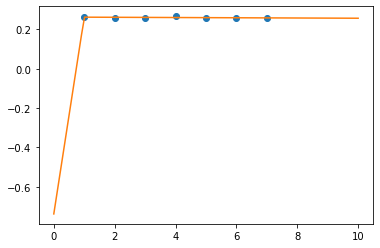

In [139]:
#Develop a piecewise linear model
from scipy import optimize
%matplotlib inline

x = np.array([1,2,3,4,5,6,7])
y = np.array([rmse_test_a1,rmse_test_a2,rmse_test_a3,rmse_test_a4,rmse_test_a5,rmse_test_a6,rmse_test_a7])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 10, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))